In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk

In [262]:
dados = pd.read_csv("Desafio -Senior Labs - 2020/sms_senior_clean.csv",  encoding='unicode_escape')
dados["Date"] = pd.to_datetime(dados["Date"], format='%Y-%m-%d %H:%M:%S')

### Com ou sem stopwords?

In [177]:
com = False

A primeira etapa do seu trabalho consiste em extrair estatísticas desta base de dados:
1. Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras,
nuvem de palavras, etc).
2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;
3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade
total de palavras (Word_Count) para cada mês;
4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).

In [178]:
if com:
    full_text = dados.Full_Text.str.cat(sep=' ').lower()
else:
    full_text = dados.Clean_Text.str.cat(sep=' ').lower()    
    print("texto limpo")

texto limpo


### Essa parte so necessita ser rodada uma vez pra criar o df com o texto limpo

In [259]:
def remove_SW(text):
    from nltk .corpus import stopwords 
    from nltk.tokenize import word_tokenize, RegexpTokenizer
    text = " "+text.lower()
    text = text.replace(" ur "," you are ").replace(" u "," you ").replace("&lt;", "<").replace("&gt;", ">")    
    
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    stop_words = set(stopwords.words('english')) 

    
    
    new_words = tokenizer.tokenize(text)
    filtered_tokens = [w for w in new_words if not w in stop_words if w.isalpha()] 
    filtered_sentence = (" ").join(filtered_tokens)

    return filtered_sentence


In [261]:
clean_text = []
for index, row in dados.iterrows():
    clean = remove_SW(row.Full_Text)
    clean_text.append(clean)

dados["Clean_Text"] = clean_text
dados.to_csv("Desafio -Senior Labs - 2020/sms_senior_clean.csv", index = False) #salvando texto limpo

## Continuacao

In [169]:
def word_count(texto):
    counts = dict()
    words = texto.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [170]:
def cria_WC(texto):
    wordcloud = WordCloud().generate(texto)
    return wordcloud

In [171]:
import operator

contagem = word_count(full_text)
contagem = sorted(contagem.items(), key = operator.itemgetter(1), reverse = True)

[('to', 2237), ('i', 2217), ('you', 1921), ('a', 1433), ('the', 1328), ('u', 998), ('and', 968), ('is', 869), ('in', 859), ('my', 755)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

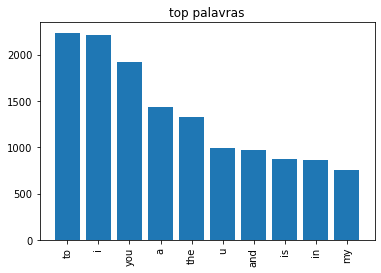

In [288]:
top_words = contagem[0:10] #deixar essa parametro do slice dinamico
print(top_words)

x = [item[0] for item in top_words]
y = [item[1] for item in top_words]

fig = plt.figure()

plt.bar(x,y)
plt.title("top palavras")
plt.xticks(rotation  = "vertical")

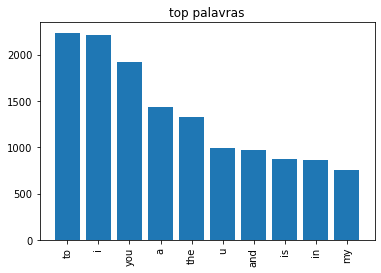

In [289]:
fig

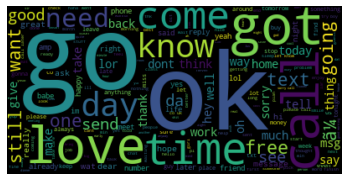

In [179]:
wordcloud = cria_WC(full_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;
3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade
total de palavras (Word_Count) para cada mês;
4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).

In [191]:
min(dados.Date)

Timestamp('2017-01-01 00:08:00')

In [204]:
max(dados.Date)

Timestamp('2017-03-31 23:56:00')

In [265]:
dados["mes"] = [data.month for data in dados.Date]
dados["dia"] = [data.day for data in dados.Date]

In [247]:
dados_mensais = []
meses = {1: 'janeiro', 2:'fevereiro',3:'marco'}

for mes in set(dados.mes):
    palavras_mes = dados.Word_Count.loc[dados.mes == mes]
    
    dias_spam = dados.dia.loc[(dados.mes == mes) & (dados.IsSpam=='yes')]
    dias_nao_spam = dados.dia.loc[(dados.mes == mes) & (dados.IsSpam=='no')]
    
    qtd_spam = len(dias_spam)
    qtd_nao_spam =  len(dias_nao_spam)
    
    cont_spam_dia = dias_spam.value_counts()
    cont_n_spam_dia = dias_nao_spam.value_counts()
    
    dados_mensais.append([meses[mes], qtd_nao_spam, qtd_spam, max(palavras_mes),min(palavras_mes),
                          palavras_mes.mean(), palavras_mes.median(),palavras_mes.std(),palavras_mes.var(), cont_spam_dia, cont_n_spam_dia])

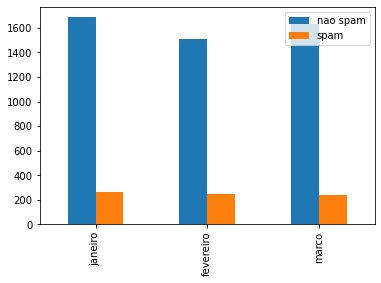

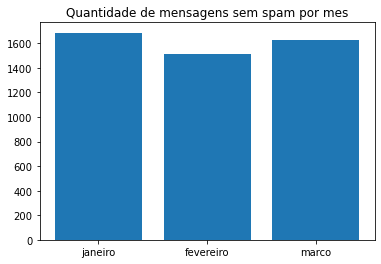

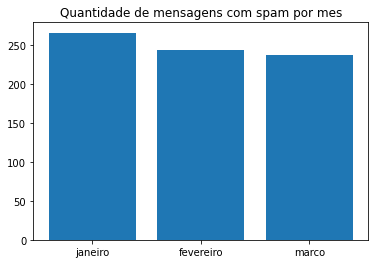

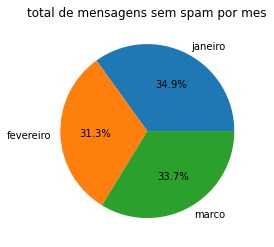

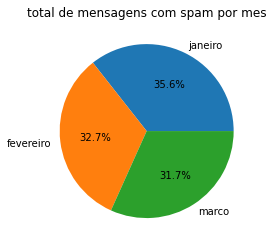

In [248]:
x = [dado[0] for dado in dados_mensais]
y1 = [dado[1]  for dado in dados_mensais]
y2 = [dado[2]  for dado in dados_mensais]

df = pd.DataFrame(np.c_[y1,y2], index=x)
df.plot.bar()
plt.legend(["nao spam","spam"])
plt.show()

ax = plt.bar(x,y1)
plt.title("Quantidade de mensagens sem spam por mes")
plt.show()

plt.bar(x,y2)
plt.title("Quantidade de mensagens com spam por mes")
plt.show()

plt.pie(y1, labels=x, autopct='%1.1f%%')
plt.title("total de mensagens sem spam por mes")
plt.show()

plt.pie(y2, labels=x, autopct='%1.1f%%')
plt.title("total de mensagens com spam por mes")
plt.show()

### Qtde palavras msg do mes: maximo, minimo, media etc

In [250]:
maximo_palavras = [dado[3]  for dado in dados_mensais]
minimo_palavras = [dado[4]  for dado in dados_mensais]
media_palavras = [dado[5]  for dado in dados_mensais]
mediana_palavras = [dado[6]  for dado in dados_mensais]
std_palavras = [dado[7]  for dado in dados_mensais]
var_palavras = [dado[8]  for dado in dados_mensais]

### Contagem de mensagem normal por dia do mes

In [254]:
contagem_dia = [[dado[0],dado[10]] for dado in dados_mensais]

# QUESTAO 2

In [263]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dados.IsSpam = le.fit_transform(dados.IsSpam)

In [268]:
X = dados.drop(columns = ["Full_Text","Clean_Text","Date","IsSpam","mes","dia"])
y = dados.IsSpam



In [271]:
y.value_counts()

#esta desbalanceado, mas vamos testar primeiro pra ver se eh um problema mesmo

0    4827
1     747
Name: IsSpam, dtype: int64

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
svc = SVC()
kneig = KNeighborsClassifier()
adaboost = AdaBoostClassifier()

algoritmos = [random_forest,decision_tree,svc,kneig,adaboost]

for classificador in algoritmos:
    classificador.fit(X_train,y_train)

    y_pred = classificador.predict(X_test)
    print(classificador, "\n\n\n", classification_report(y_test,y_pred), "\n\n",accuracy_score(y_test,y_pred), "\n\n", confusion_matrix(y_test,y_pred),"\n\n")

RandomForestClassifier() 


               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1456
           1       0.96      0.81      0.88       217

    accuracy                           0.97      1673
   macro avg       0.96      0.90      0.93      1673
weighted avg       0.97      0.97      0.97      1673
 

 0.9701135684399282 

 [[1448    8]
 [  42  175]] 


DecisionTreeClassifier() 


               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1456
           1       0.88      0.79      0.83       217

    accuracy                           0.96      1673
   macro avg       0.92      0.89      0.90      1673
weighted avg       0.96      0.96      0.96      1673
 

 0.9581589958158996 

 [[1432   24]
 [  46  171]] 


SVC() 


               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1456
           1       0.99      0.53      0.69       217

    